In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

## Pricing European Options

$$\left(\frac{\Delta S}{S}\right) = \mu * \Delta t + \sigma * \epsilon * \sqrt{\Delta t}$$

In [2]:
u = 0.1
sigma = 0.07
t_step = 0.01
S0 = 100
St = S0

num_simulations = 1000
num_steps = 100

In [3]:
arr = []
for __ in range(num_simulations):
    St = S0
    arr_temp = []
    for _ in range(num_steps):
        arr_temp.append(St)
        St += St * u * t_step + St * sigma  * math.sqrt(t_step) * np.random.normal(0,1)
    arr.append(arr_temp)

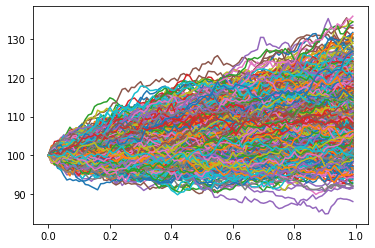

In [4]:
for x in arr:
    plt.plot(np.arange(0,1.0,0.01), x)

Assume stock prices are lognormally distributed

$$ ln \left(\frac{\Delta S_{t + \Delta t}}{S_{t}}\right) = (\mu - \frac{\sigma^{2}}{2}) * \Delta t + \sigma * \epsilon * \sqrt{\Delta t} $$

--> 
$$ S_{t + \Delta t} = S_{t}\ exp[(\mu - \frac{\sigma^{2}}{2}) * \Delta t + \sigma * \epsilon * \sqrt{\Delta t} $$

In [5]:
def generate_asset_price(S0, u, sigma, T):
    return S0 * math.exp((u - sigma**2 / 2) * T + sigma * np.random.normal(0,1) * math.sqrt(T))

def call_payoff(ST, K):
    return max(ST-K, 0)

In [6]:
arr = []
for __ in range(num_simulations):
    St = S0
    arr_temp = []
    for _ in range(num_steps):
        arr_temp.append(St)
        St = St * math.exp((u - sigma**2 / 2) * t_step + sigma * np.random.normal(0,1) * math.sqrt(t_step))
    arr.append(arr_temp)

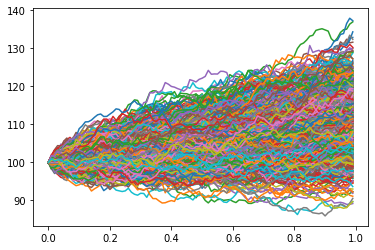

In [7]:
for x in arr:
    plt.plot(np.arange(0,1.0,0.01), x)

In [8]:
S = 857.29 # underlying price
v = 0.2076 # vol of 20.76%
r = 0.0014 # rate of 0.14%
T = (datetime.date(2013,9,21) - datetime.date(2013,9,3)).days / 365.0
K = 860.

simulations = 90000
payoffs = []
discount_factor = math.exp(-r * T)

In [9]:
for _ in range(simulations):
    payoffs.append(call_payoff(generate_asset_price(S, r, v, T), K) * discount_factor)

In [10]:
sum(payoffs) / len(payoffs)

14.352350253247208

## Pricing Barrier Options

## Plotting Volatility Surface